# SymPy를 사용한 함수 미분

## 성능함수, 목적함수, 손실함수, 비용함수

데이터 분석의 목표는 가장 최적의(optimal) 모형을 구하는 일이다. 예측 모형은 입력 데이터 이외에도 **모수(parameter)**라고 하는 숫자를 가진다. 선형 예측 모형에서는 입력 데이터에 대한 **가중치(weight)가 모수**가 된다. 모수를 어떤 숫자로 정하느냐에 따라 예측 모형의 성능이 달라진다. 즉, **모수를 함수의 입력이라고 한다면 성능은 함수의 출력**이 된다. 이렇게 모수를 입력받아 모형의 성능을 출력하는 함수를 **성능함수(performance function), 목적함수(objective function)**라고 한다.  $x$ 데이터를 받아 $y$ 데이터를 출력하는 예측함수와는 다른 함수라는 점에 주의한다. 성능함수나 목적함수의 값은 클수록 좋다. 

이와는 반대로 모수를 입력받아 오차 혹은 오류의 크기를 출력하는 함수를 가장 작게 하는 것을 목표로 할 수도 있다. 이러한 함수는 **손실함수(loss function)** 또는 **비용함수(cost function)**라고 부른다.

<img src="https://datascienceschool.net/upfiles/883f9a06faf54a2da213679b1589442a.png" style="width:100%;">

그림 6.1.1 : 손실 함수 

예를 들어 다음과 같은 선형예측모형을 사용하는 경우,

$$ \hat{y} = w_1 x_1 +  w_2 x_2 + \ldots +  w_N x_N  = w^T x $$

우리가 결정할 수 있는 것은 선형예측모형의 가중치 $w$, 즉 $w_1, w_2, \ldots, w_N$의 값이다. 이 가중치 값을 어떻게 설정하느냐에 따라 예측 오차의 값이 바뀌므로 가중치가 모수(parameter)가 된다. 

선형예측모형에서 우리가 줄이고자 하는 값은 오차의 크기(제곱합) $e^Te$이라는 손실함수이다.

$$\text{모수 } w  \;\; \xrightarrow{\text{손실함수}} \;\; \text{예측 오차의 크기 } e^Te  $$


## 최적화

이렇게 함수의 값이 가장 커지거나 가장 작아지게 하는 입력변수의 값을 찾아내는 것을 **최적화(optmization)**이라고 한다.

비유를 들자면 조절나사의 각도와 음량이 비례하지 않고 제멋대로인 고장난 앰프가 있을 때 출력 음량이 최대가 되는 조절나사의 각도를 찾는 문제와 같다고 볼 수 있다.

<img src="https://datascienceschool.net/upfiles/2330af56eab04a60abb081672078c236.png" style="width:100%;">

그림 6.1.2 : 생활 속의 최적화 예

## 데이터 분석에서 미분이 필요한 이유

데이터 분석에서 우리가 최종적으로 원하는 것은 결국 최적화(optimization) 작업이다. 그런데 수치적 최적화는 **미분(differentiation)** 없이는 불가능하다. 이것이 데이터 분석에서 미분이 필요한 이유이다.

다행스러운 점은 데이터 분석에서 필요한 미분의 수준은 그다지 높지 않다는 점이다. 또한 최근의 딥러닝용 라이브러리인 theano, tensorflow 등에서는 파이썬이 자동으로 심볼릭 미분(symbolic differentiation) 연산을 하기 때문에 실제로 사람이 직접 미분을 계산해야 하는 경우는 많지 않다. 다만 그 원리에 대해서는 확실히 이해하고 있어야 한다.

## 기울기

수치적 최적화를 하려면 현재 사용한 $x$의 값이 아닌 또 다른 $x$의 값을 시도할 때 어떤 값을 시도해야 할 지를 결정해야 한다. 그러려면 $x$를 증가시켰을 때 $y$값이 증가하는지 감소하는지, 증가한다면 어느 정도 증가하는 지를 알아야 한다. 즉  함수에 들어가는 **입력이 달라졌을 때 출력이 어떻게 변하는지**를 알아야 한다. 위에서 고장난 앰프에 비유하자면 조절나사를 오른쪽으로 1도만큼 돌렸을 때 소리가 커지는지 작아지는지, 커진다면 금방 커지는지 아주 조금씩 커지는지를 알아야 할 것이다. 이 정보를 **기울기(slope)** 혹은 **민감도(sensitivity)**라고 한다.

만약 입력변수의 값이 $x$에서 $x_2$로 달라졌다고 가정하자. 출력변수는 $f(x)$이라는 값에서 $f(x_2)$라는 값으로 달라질 것이다. 이를 비율로 나타내면 다음과 같다. 여기에서 $dx = x_2 - x$이다.

$$ \dfrac{\text{y의 변화량}}{\text{x의 변화량}} = \dfrac{f(x_2) - f(x)}{x_2 - x} = \dfrac{f(x + dx) - f(x)}{dx} $$

이러한 변화율은 $x_2$를 $x_1$에서 얼마나 멀리 떨어져 있는가 즉, $dx$의 값에 따라 달라진다. 이를 해결하기 위해 **기울기(slope)**라는 개념을 사용한다. 기울기는 $dx$값이 0으로 근접할 때의 변화율을 말한다. 기호로는 다음처럼 쓴다.

$$ \text{기울기} = \lim_{dx\rightarrow 0} \dfrac{f(x + dx) - f(x)}{dx} $$


이번에는 기울기를 함수의 그래프에서 살펴보자. 함수의 그래프는 앞에서 그린 것처럼 부드러운 곡선(curve)의 형태로 나타나는 경우가 많다. 이 곡선에 대해 한 점만 공통으로 가지는 **접선(tangent)**을 그릴 수 있는데 이 접선이 수평선과 이루는 **기울기는 접선이 $x$ 방향으로 이동한 거리와 $y$ 방향으로 이동한 거리의 비율**을 말한다.

$$ \text{기울기} =  \dfrac{\text{접선이 $y$ 방향으로 이동한 거리}}{\text{접선이 $x$ 방향으로 이동한 거리}} $$

다음 그림에서 $x=0$과 $x=1$에서의 기울기는 각각 $1$, $-2$이다.

$$ x=0\text{에서의 기울기} =  \dfrac{1}{1} = 1 $$

$$ x=1\text{에서의 기울기} =  \dfrac{-2}{1} = -2 $$

In [1]:
def f(x):
    return x**3 - 3 * x**2 + x

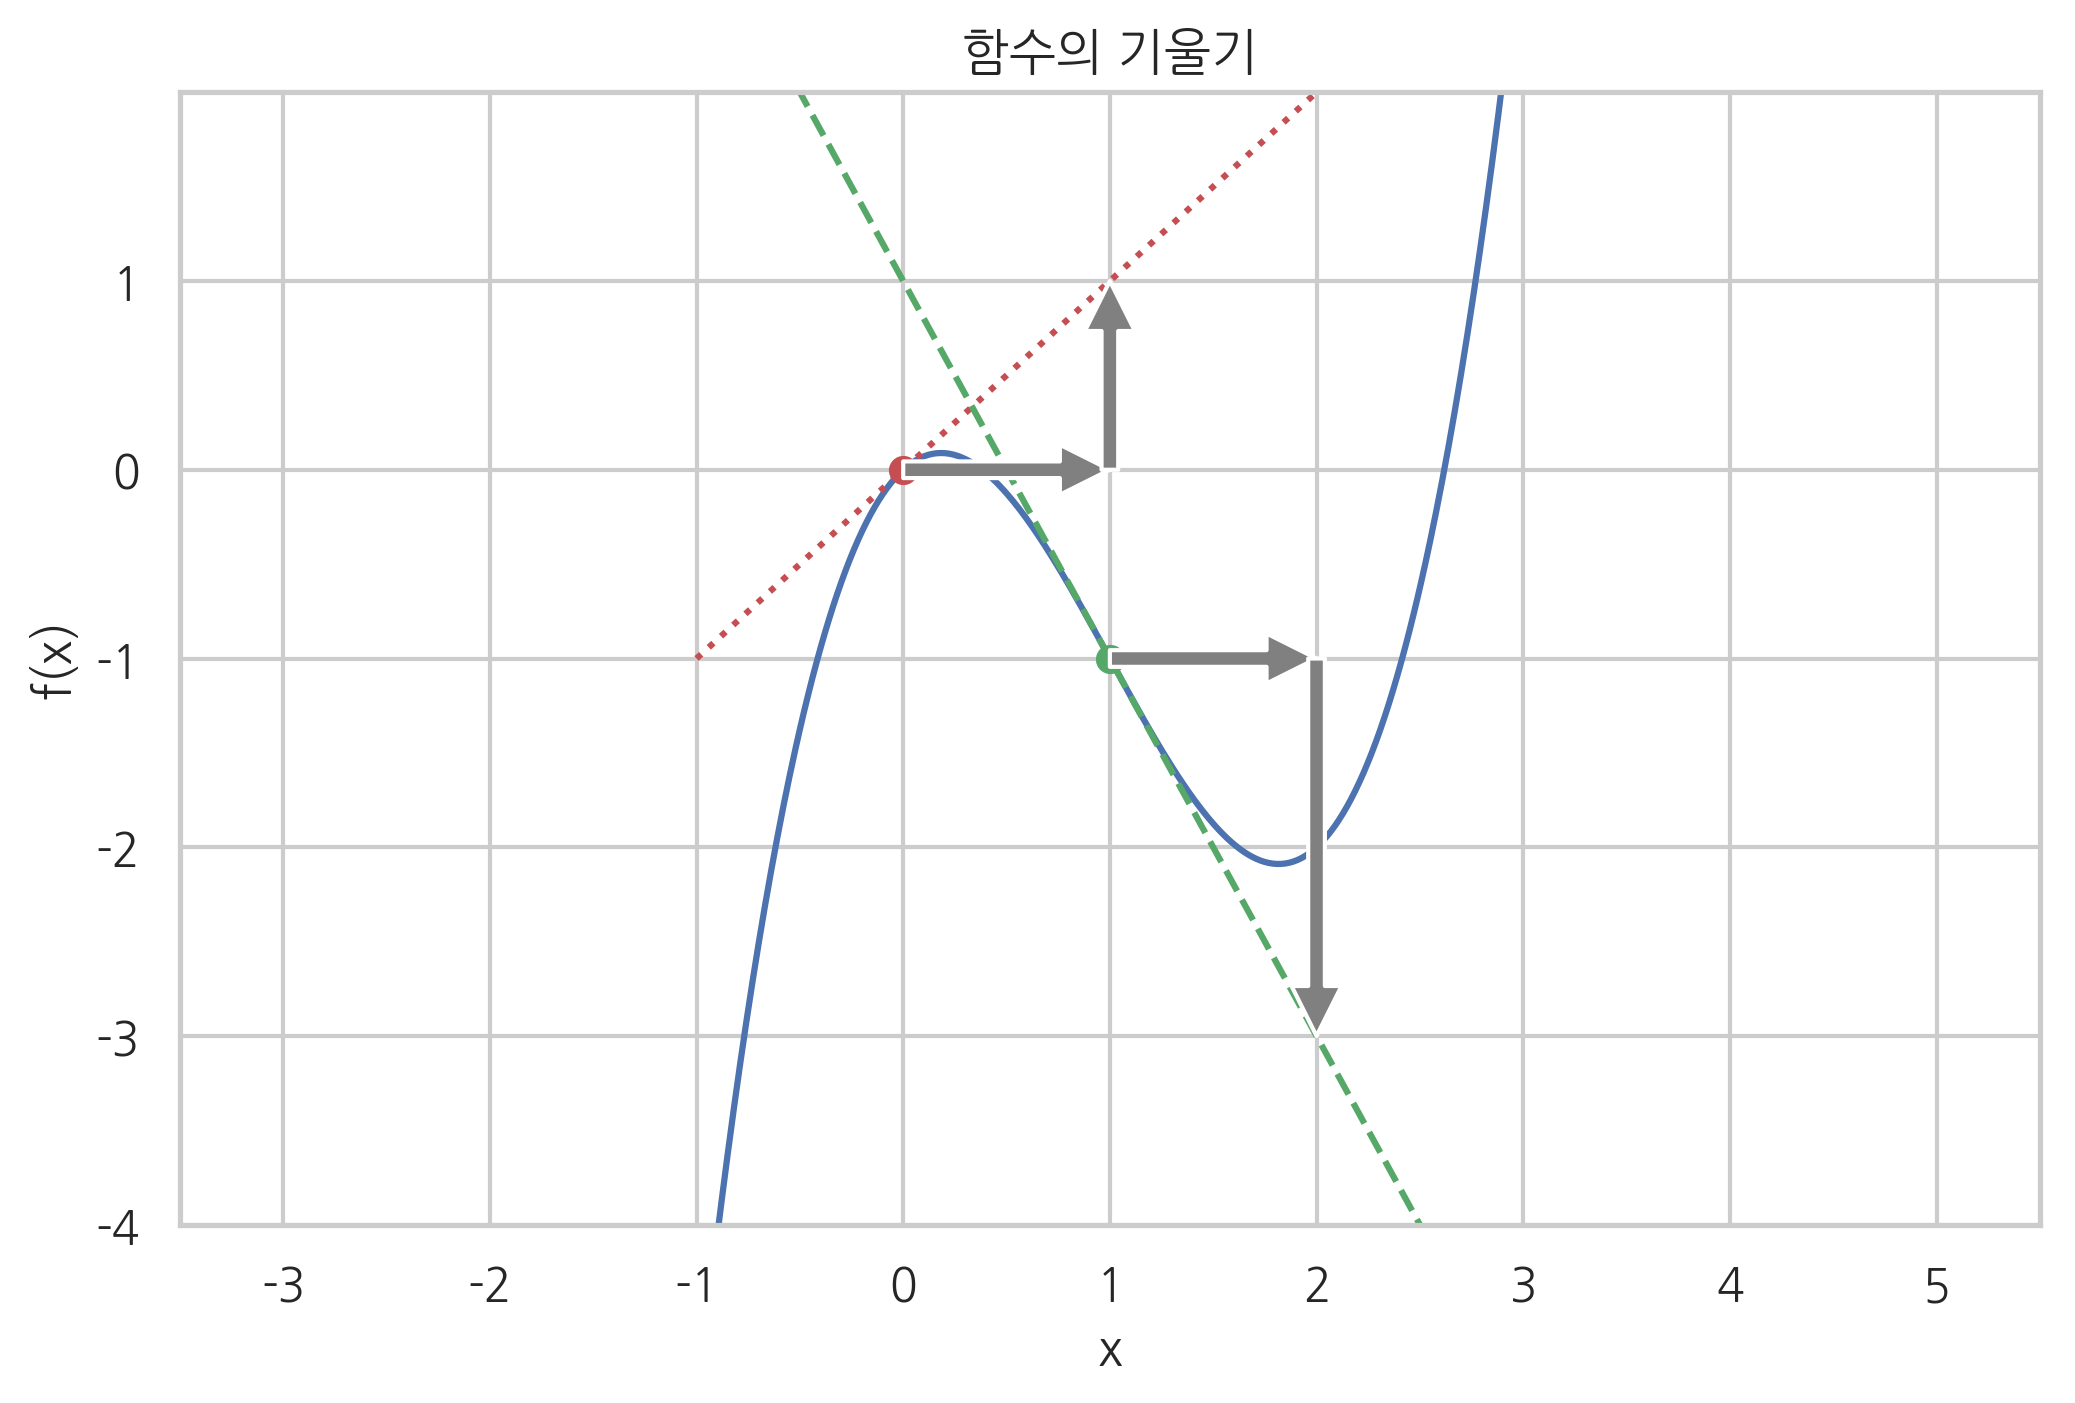

In [2]:
x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

#### 연습 문제 6.1.4

위 함수에서 다음  $x$ 값들에 대해 기울기의 값이 얼마쯤인지 대략적으로 가늠하여 적어본다.

| $x$  | $-0.5$ |  $0$  |  $0.5$ |  $1$  |  $1.5$ |  $2$  |  $2.5$ |
| ---- |---- | --- | ---- | --- | ---- | --- | ---- |
| 기울기 | $  $  |   $1$ | $ $ |  $-2$  | $ $ | $  $ | $ $ | 


## 수치미분

scipy.misc 패키지의 ``derivative`` 명령을 사용하면 수치적으로 대략적인 기울기를 계산할 수 있다. 인수로는 기울기를 구하고자 하는 함수 `f`, 기울기를 구할 위치 `x`, 기울기를 구하기 위해 이동할 거리 `dx`를 받는다. 다음 수식으로 대략적인 기울기는 구한다. 

$$ \text{기울기} \approx \dfrac{f(x + 0.5 \cdot dx) - f(x - 0.5 \cdot  dx)}{dx} $$

이렇게 기울기를 구하는 방법을 **수치미분(numerical differentiation)**이라고 한다. 수치 미분으로는 대략적인 기울기를 구할 뿐 정확한 값을 구할 수 없다.

In [3]:
from scipy.misc import derivative

In [4]:
derivative(f, 0, dx=1e-6)

1.000000000001

In [5]:
derivative(f, 1, dx=1e-6)

-2.000000000002

## 미분

**미분(differenciation)**이란 **어떤 함수로부터 그 함수와 연관성이 있는 새로운 함수를 만들어내는 작업**이다. 미분으로 만들어진 함수를 원래 함수의 **도함수(derivative)**라고 한다.  **미분을 통해 만들어진 도함수는 같은 입력에 대해 원래 함수의 기울기(slope)를 출력한다**. 원래는 수렴(converge)과 극한(limit)이라는 수학적인 개념을 사용하여 미분을 정의하지만 여기에서는 자세한 설명을 생략한다.

도함수는 원래 함수에 프라임(prime) 기호($'$)를 붙이거나 원래 함수의 앞에 $\dfrac{d}{dx}$를 붙여서 표시한다. 분수처럼 표기하기도 하는데 분모의 위치에는 미분하고자 하는 변수가 오고 분자의 위치에는 미분하는 함수 자체의 기호나 혹은 함수 계산의 결과로 얻어지는 출력 변수를 넣는다. 예를 들어 $y = f(x)$라는 함수를 미분하여 구한 도함수는 다음과 같이 여러가지 방법으로 표기할 수 있다. 도함수의 표기는 분수와 비슷하지만 분수의 기호만 빌려온 것일 뿐 분수가 아니라는 점에 주의한다. 

$$ f' = \dfrac{d}{dx}(f) = \dfrac{d}{dx}f = \dfrac{df}{dx}  = \dfrac{d}{dx}(y) = \dfrac{d}{dx}y = \dfrac{dy}{dx} $$

이 식에서 $f'$는 "f 프라임(prime)"이라고 읽고 $\dfrac{df}{dx}$는 "df 오버(over) dx"라고 읽는다.

위치 $x$에서 도함수의 값 $f'(x)$은 그 위치에서의 함수의 기울기와 같으므로 다음처럼 쓸 수 있다.

$$ f'(x) = f(x)\text{의 기울기} $$

#### 연습 문제 6.1.5

앞절에서 구한 기울기 값 표를 이용하여 도함수의 그래프를 그려본다.

## 미분 가능

함수에 따라서는 어떤 점에서는 기울기 값을 정의하기 어려울 수가 있다. 예를 들어 다음 함수는 $x=0$인 위치에서 기울기를 정의할 수 없다. 이런 경우에는 $x=0$에서 **미분 불가능(not differentiable)**이라고 한다. 반대로 기울기를 구할 수 있으면 **미분 가능(differentiable)**이라고 한다.

예들 들어 ReLU 함수는 $x<0$인 구간에서는 기울기가 0이고 $x>0$인 구간에서는 기울기가 1이지만 $x=0$인 위치에서는 접선이 존재하지 않아서 미분할 수 없다.

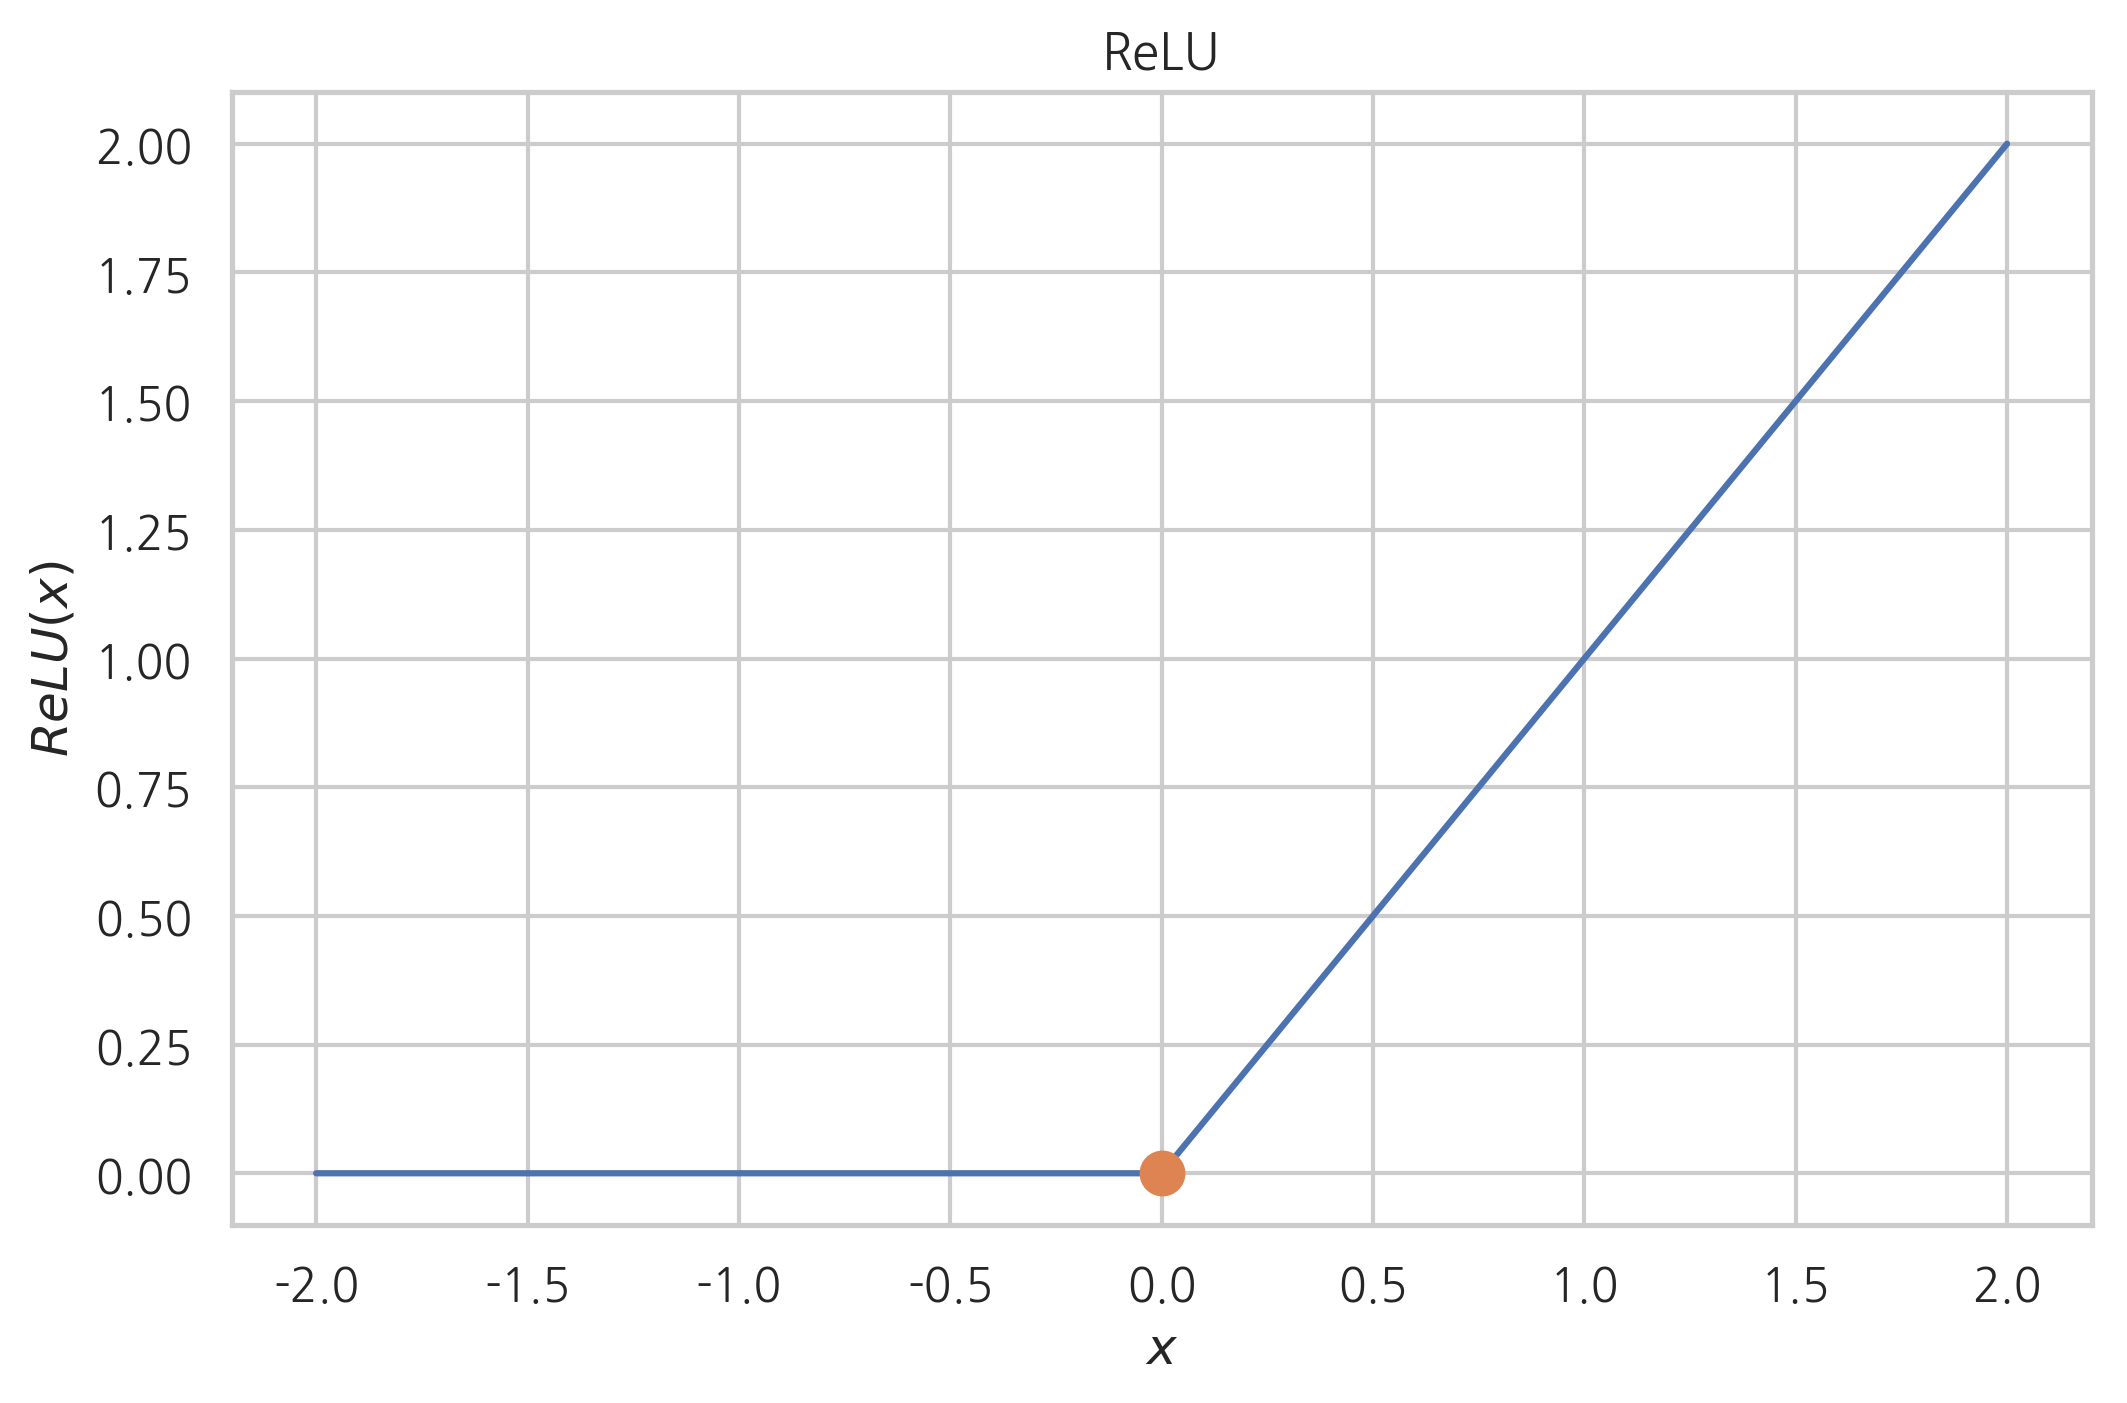

In [6]:
def relu(x):
    return np.where(x > 0, x, 0)


xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

## 미분공식

몇가지 미분공식을 조합하면 복잡한 함수의 도함수도 쉽게 구할 수 있다.  여기에서는 가장 핵심적인 4가지 공식만을 소개한다. 

* 기본 미분공식
* 선형조합법칙
* 곱셈법칙
* 연쇄법칙

### 기본 미분공식

* 상수

상수를 미분하면 0이 된다.

$$ \dfrac{d}{dx}(c) = 0 $$

* 거듭제곱

$x$의 $n$ 제곱을 미분하면 $n-1$ 제곱으로 제곱수가 1씩 감소한다. 이 공식은 $n$이 자연수이거나 음의 정수일 때 성립한다. $n=0$일 때는 성립하지 않는다.

$$ \dfrac{d}{dx}(x^n) = n x^{n-1} $$

거듭제곱공식을 응용하면 다음과 같이 미분할 수 있다.

$$ \dfrac{d}{dx} x^3 = 3 x^2 $$
$$ \dfrac{d}{dx} x^2 = 2 x^1 = 2x $$
$$ \dfrac{d}{dx} x = x^1 = 1 \cdot x^0 = 1 $$
$$ \dfrac{d}{dx}\left(\dfrac{1}{x}\right) = \dfrac{d}{dx}x^{-1} = -1 x^{-2} = -\dfrac{1}{x^2} $$
$$ \dfrac{d}{dx}\left(\dfrac{1}{x^2}\right) = \dfrac{d}{dx}x^{-2} = -2 x^{-3} = -\dfrac{2}{x^3} $$
$$ \dfrac{d}{dx}\left(\dfrac{1}{x^3}\right) = \dfrac{d}{dx}x^{-3} = -3 x^{-4} = -\dfrac{3}{x^4} $$


* 로그

로그함수를 미분하면 $x^{-1}$이 된다.

$$ \dfrac{d}{dx}(\log x) = \dfrac{1}{x} $$

* 지수

밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.

$$ \dfrac{d}{dx}(e^x) = e^x $$

### 선형조합법칙

어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.

$$ \dfrac{d}{dx}(cf) = c \cdot \dfrac{df}{dx} $$

어떤 두 함수를 더한 함수를 미분한 결과는 원래 함수의 도함수를 더한 것과 같다.

$$ \dfrac{d}{dx}\left(f_1 + f_2\right) = \dfrac{df_1}{dx} +  \dfrac{df_2}{dx}$$

위의 결과를 합치면 어떤 함수에 각각 상수를 곱한 후 더한 **선형조합(linear combination)**은 각 함수의 도함수를 선형조합한 것과 같다.

$$ \dfrac{d}{dx}\left(c_1 f_1 + c_2 f_2 \right) = c_1 \dfrac{df_1}{dx} + c_2 \dfrac{df_2}{dx}$$

이러한 기본 공식을 사용하여 다음 함수를 미분하면,

$$ y = 1 + 2x + 3x^2 + 4\exp(x) + 5\log(x) $$ 

답은 다음과 같다.

$$ \dfrac{dy}{dx} = 2 + 6x + 4\exp(x) + \dfrac{5}{x} $$

이 방법으로 위에서 그래프를 그렸던 함수의 도함수를 구하면 다음과 같다.

$$ f(x) = x^3 - 3x^2 + x $$

$$ f'(x) = 3x^2 - 6x + 1 $$

도함수의 값이 기울기와 일치하는 것을 알 수 있다.

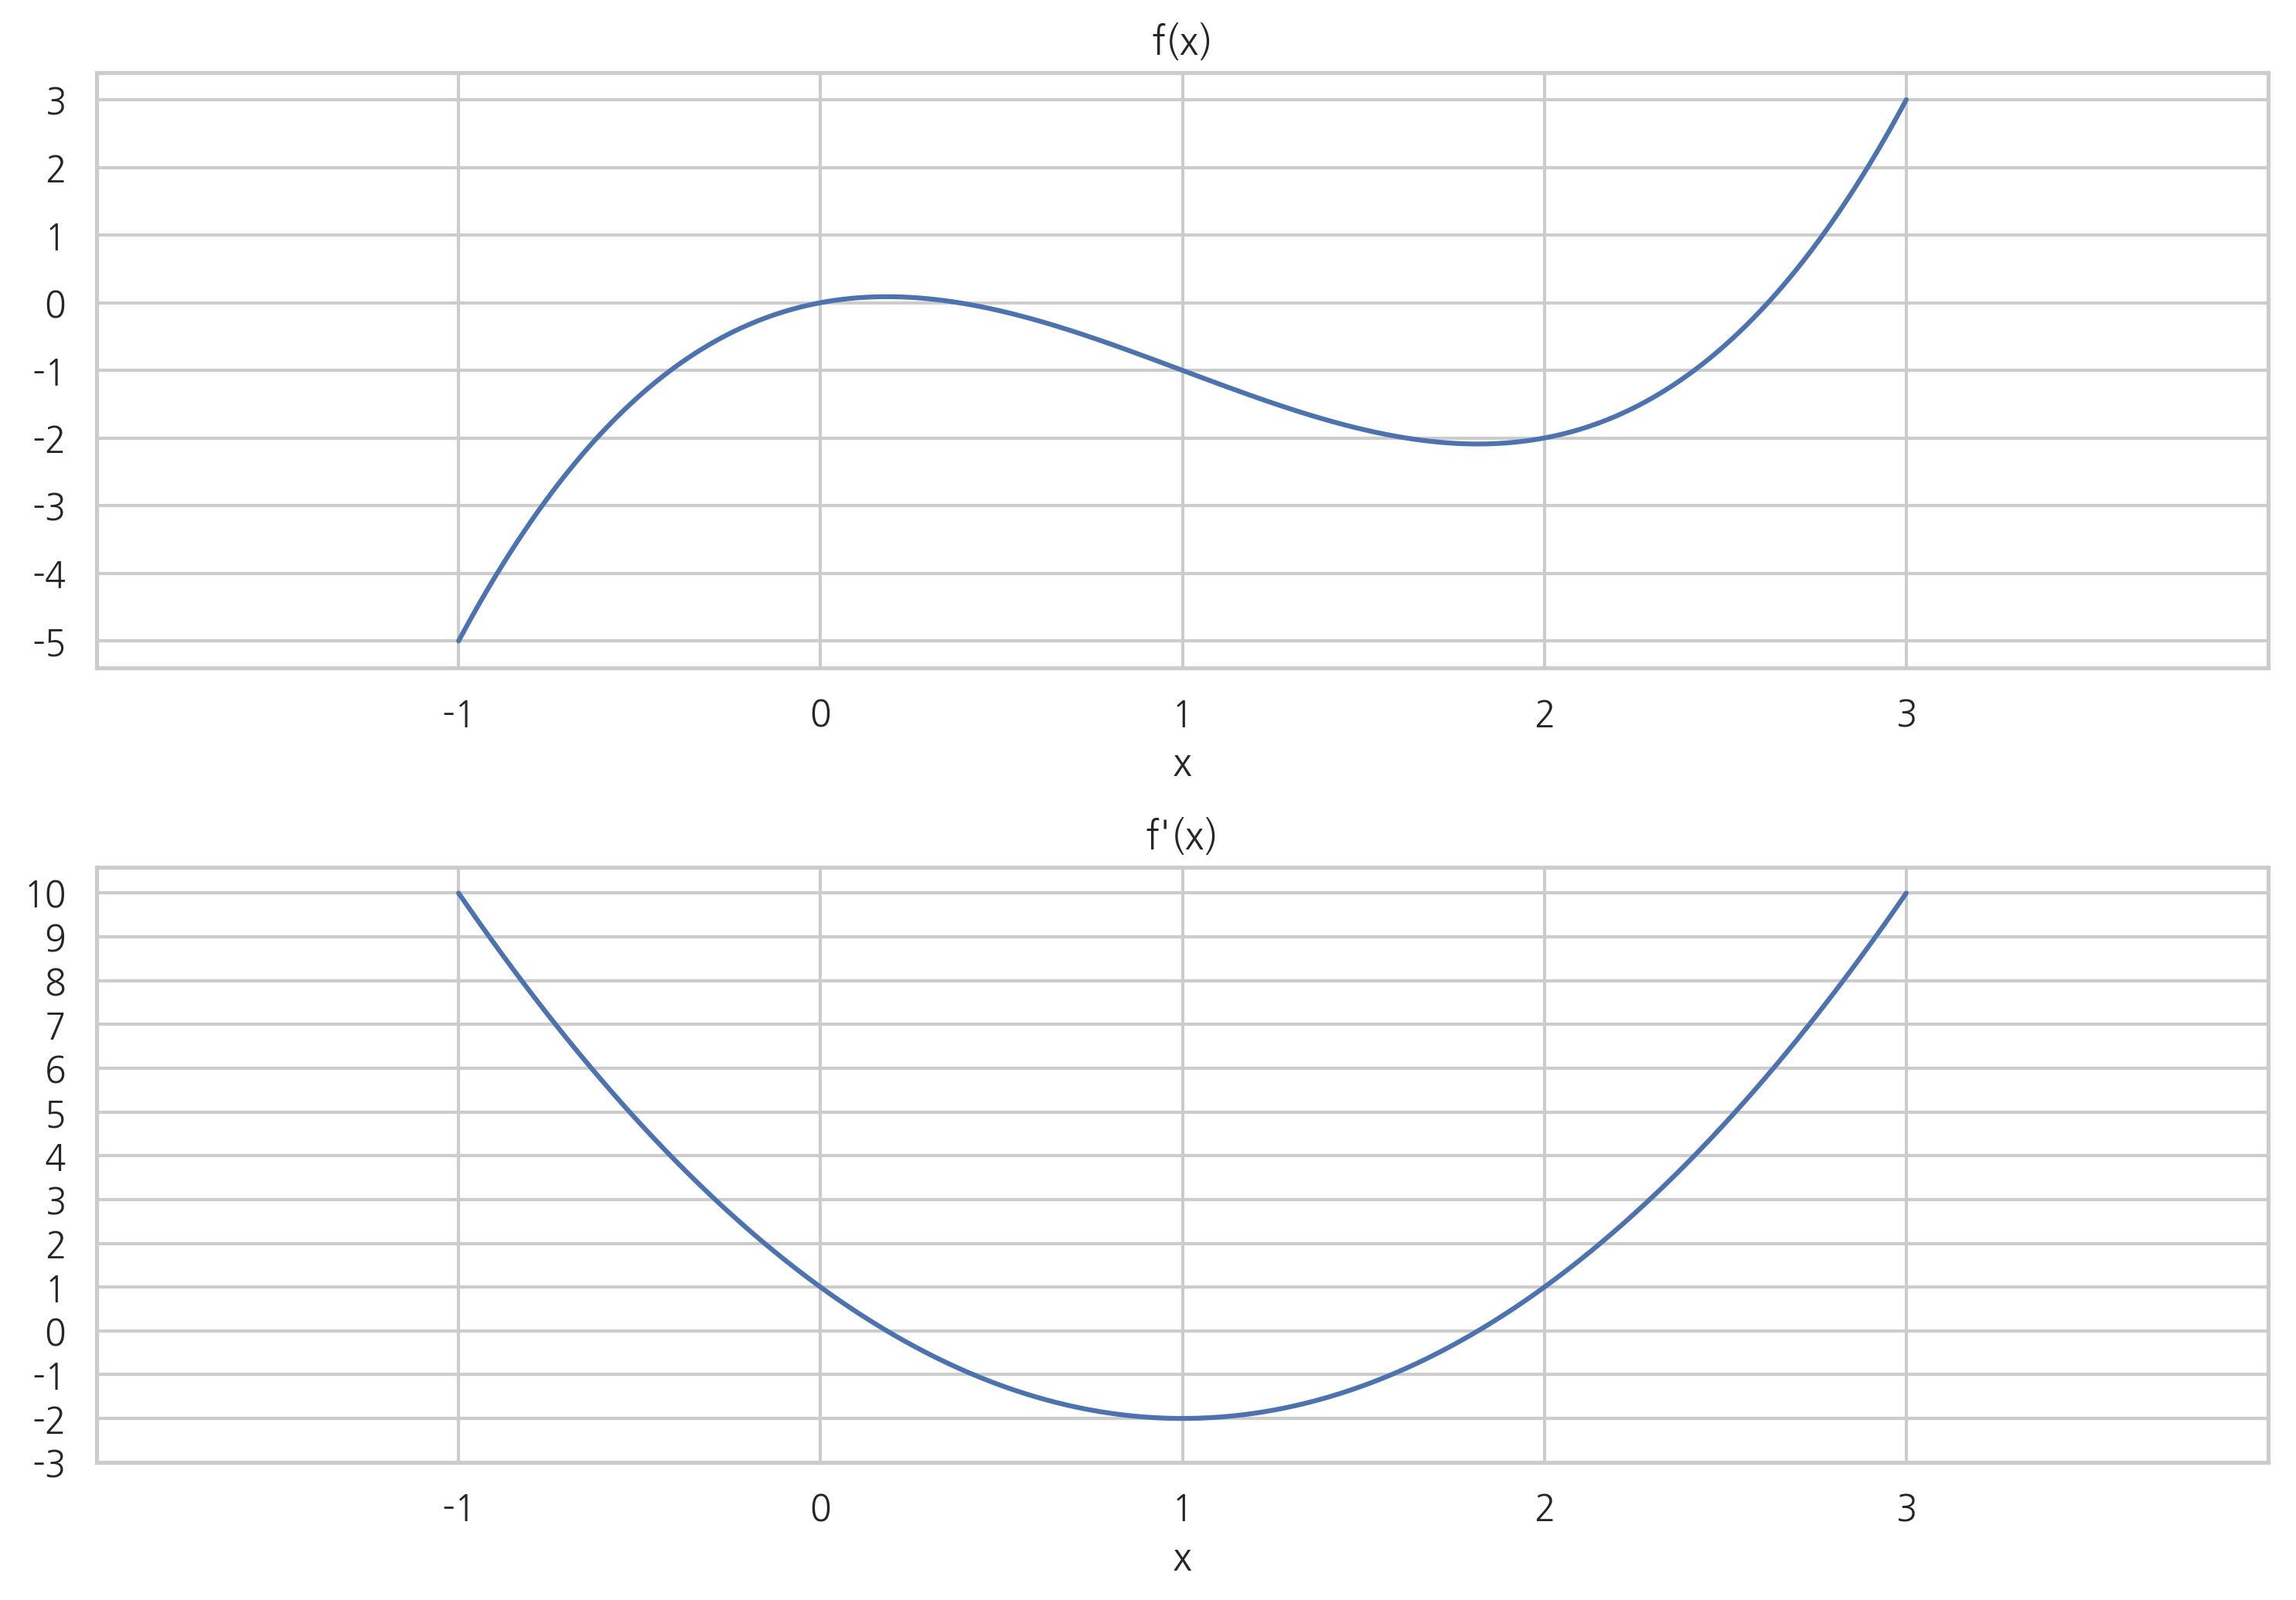

In [7]:
def fprime(x):
    return 3*x**2 - 6*x + 1


x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('f(x)')
plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("f'(x)")
plt.tight_layout()
plt.show()

### 곱셈법칙

어떤 함수의 형태가 두 개의 함수를 곱한 것과 같을 때는 다음과 같이 각 개별 함수의 도함수를 사용하여 원래의 함수의 도함수를 구한다. 이를 **곱셈법칙**이라고 한다.

$$  \dfrac{d}{dx}\left( f  \cdot g \right) = f \cdot  \dfrac{dg}{dx} + \dfrac{df}{dx} \cdot g $$

곱셈법칙을 사용하면 다음과 같은 함수를 미분하여,

$$ f = x e^x $$

다음과 같은 도함수를 구한다.

$$ \dfrac{df}{dx} = x e^x + e^x $$

### 연쇄법칙

**연쇄법칙(chain rule)**은 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용할 수 있다.

$$ f(x) = h(g(x)) $$


인 경우 도함수는 다음과 같이 구한다.

$$ \dfrac{df}{dx} = \dfrac{dh}{dg} \cdot \dfrac{dg}{dx} $$



예를 들어 나중에 공부하게 될 가우시안 정규분포(Gaussian normal distribution)의 확률밀도함수(probability density function)는 기본적으로 다음과 같은 형태라고 볼 수 있다.

$$ f = \exp \dfrac{(x-\mu)^2}{\sigma^2} $$

이 함수의 도함수는 다음과 같이 구할 수 있다.


우선 위의 함수는 다음과 같이 세 개의 함수의 조합으로 생각할 수 있다. 여기에서 $y$, $z$ 라는 중간 변수를 임시로 정의하였다.

$$  f = \exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2}   \;,\;\;\;\;   y = x-\mu   $$

연쇄법칙을 적용하면 다음과 같다.

$$ \dfrac{df}{dx} = \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx} $$

연쇄법칙에 사용된 각각의 도함수는 다음과 같다. 이 때 임시로 사용된 중간 변수는 없앤다.


$$ \dfrac{df}{dz} = \exp(z) = \exp \dfrac{(x-\mu)^2}{\sigma^2} $$


$$ \dfrac{dz}{dy} =  \dfrac{2y}{\sigma^2} = \dfrac{2(x-\mu)}{\sigma^2} $$


$$ \dfrac{dy}{dx} =  1 $$

이 결과를 연쇄법칙에 따라 곱하면 최종적인 도함수를 구할 수 있다.

$$ \dfrac{df}{dx} =  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}$$

#### 연쇄법칙의 예: 로그함수의 미분

로그 함수에 연쇄법칙을 적용하면 다음과 같은 규칙을 얻을 수 있다.

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} $$

#### 연습 문제 6.1.6

다음 함수를 미분하라. 이 식에서 $k$, $a$, $b$는 변수가 아니라 상수이다.

1. $ f(x) = x^3 - 1 $
2. $ f(x) = \log (x^{2}-3k) $
3. $ f(x) =\exp({ax^b}) $


## 2차 도함수

도함수를 한 번 더 미분하여 만들어진 함수를 **2차 도함수(second derivative)**라고 한다. 2차 도함수는 2개의 prime 기호($''$)를 붙이거나 $\dfrac{d^2}{dx^2}$ 기호로 표시한다.


예를 들어 $y = f(x)$라는 함수를 두 번 미분하여 구한 2차 도함수는 다음과 같이 표기한다.

$$ f'' = \dfrac{d^2}{dx^2}(f) = \dfrac{d^2}{dx^2}f = \dfrac{d^2f}{dx^2}  = \dfrac{d^2}{dx^2}(y) = \dfrac{d^2}{dx^2}y = \dfrac{d^2y}{dx^2} $$

2차 도함수는 도함수의 기울기를 나타낸다. 즉 도함수 값이 증가하면 2차 도함수 값은 양수이고, 도함수 값이 감소하면 2차 도함수 값은 음수이다.
**2차 도함수 값이 양수인 경우를 볼록(convex)하다**고 하며 2차 도함수 값이 음수인 경우를 오목(concave)하다고 한다. 이 때 볼록과 오목은 아래에서 바라 본 관점이다. 그래서 2차 도함수값을 **볼록도(convexity)**라고도 부른다. 

다음 예제의 함수는 $f''(x)$가 음수인 구간($ x < 1$)에서는 오목(concave)하고 $f''(x)$가 양수인 구간($ x > 1$)에서는 볼록(convex)하다.

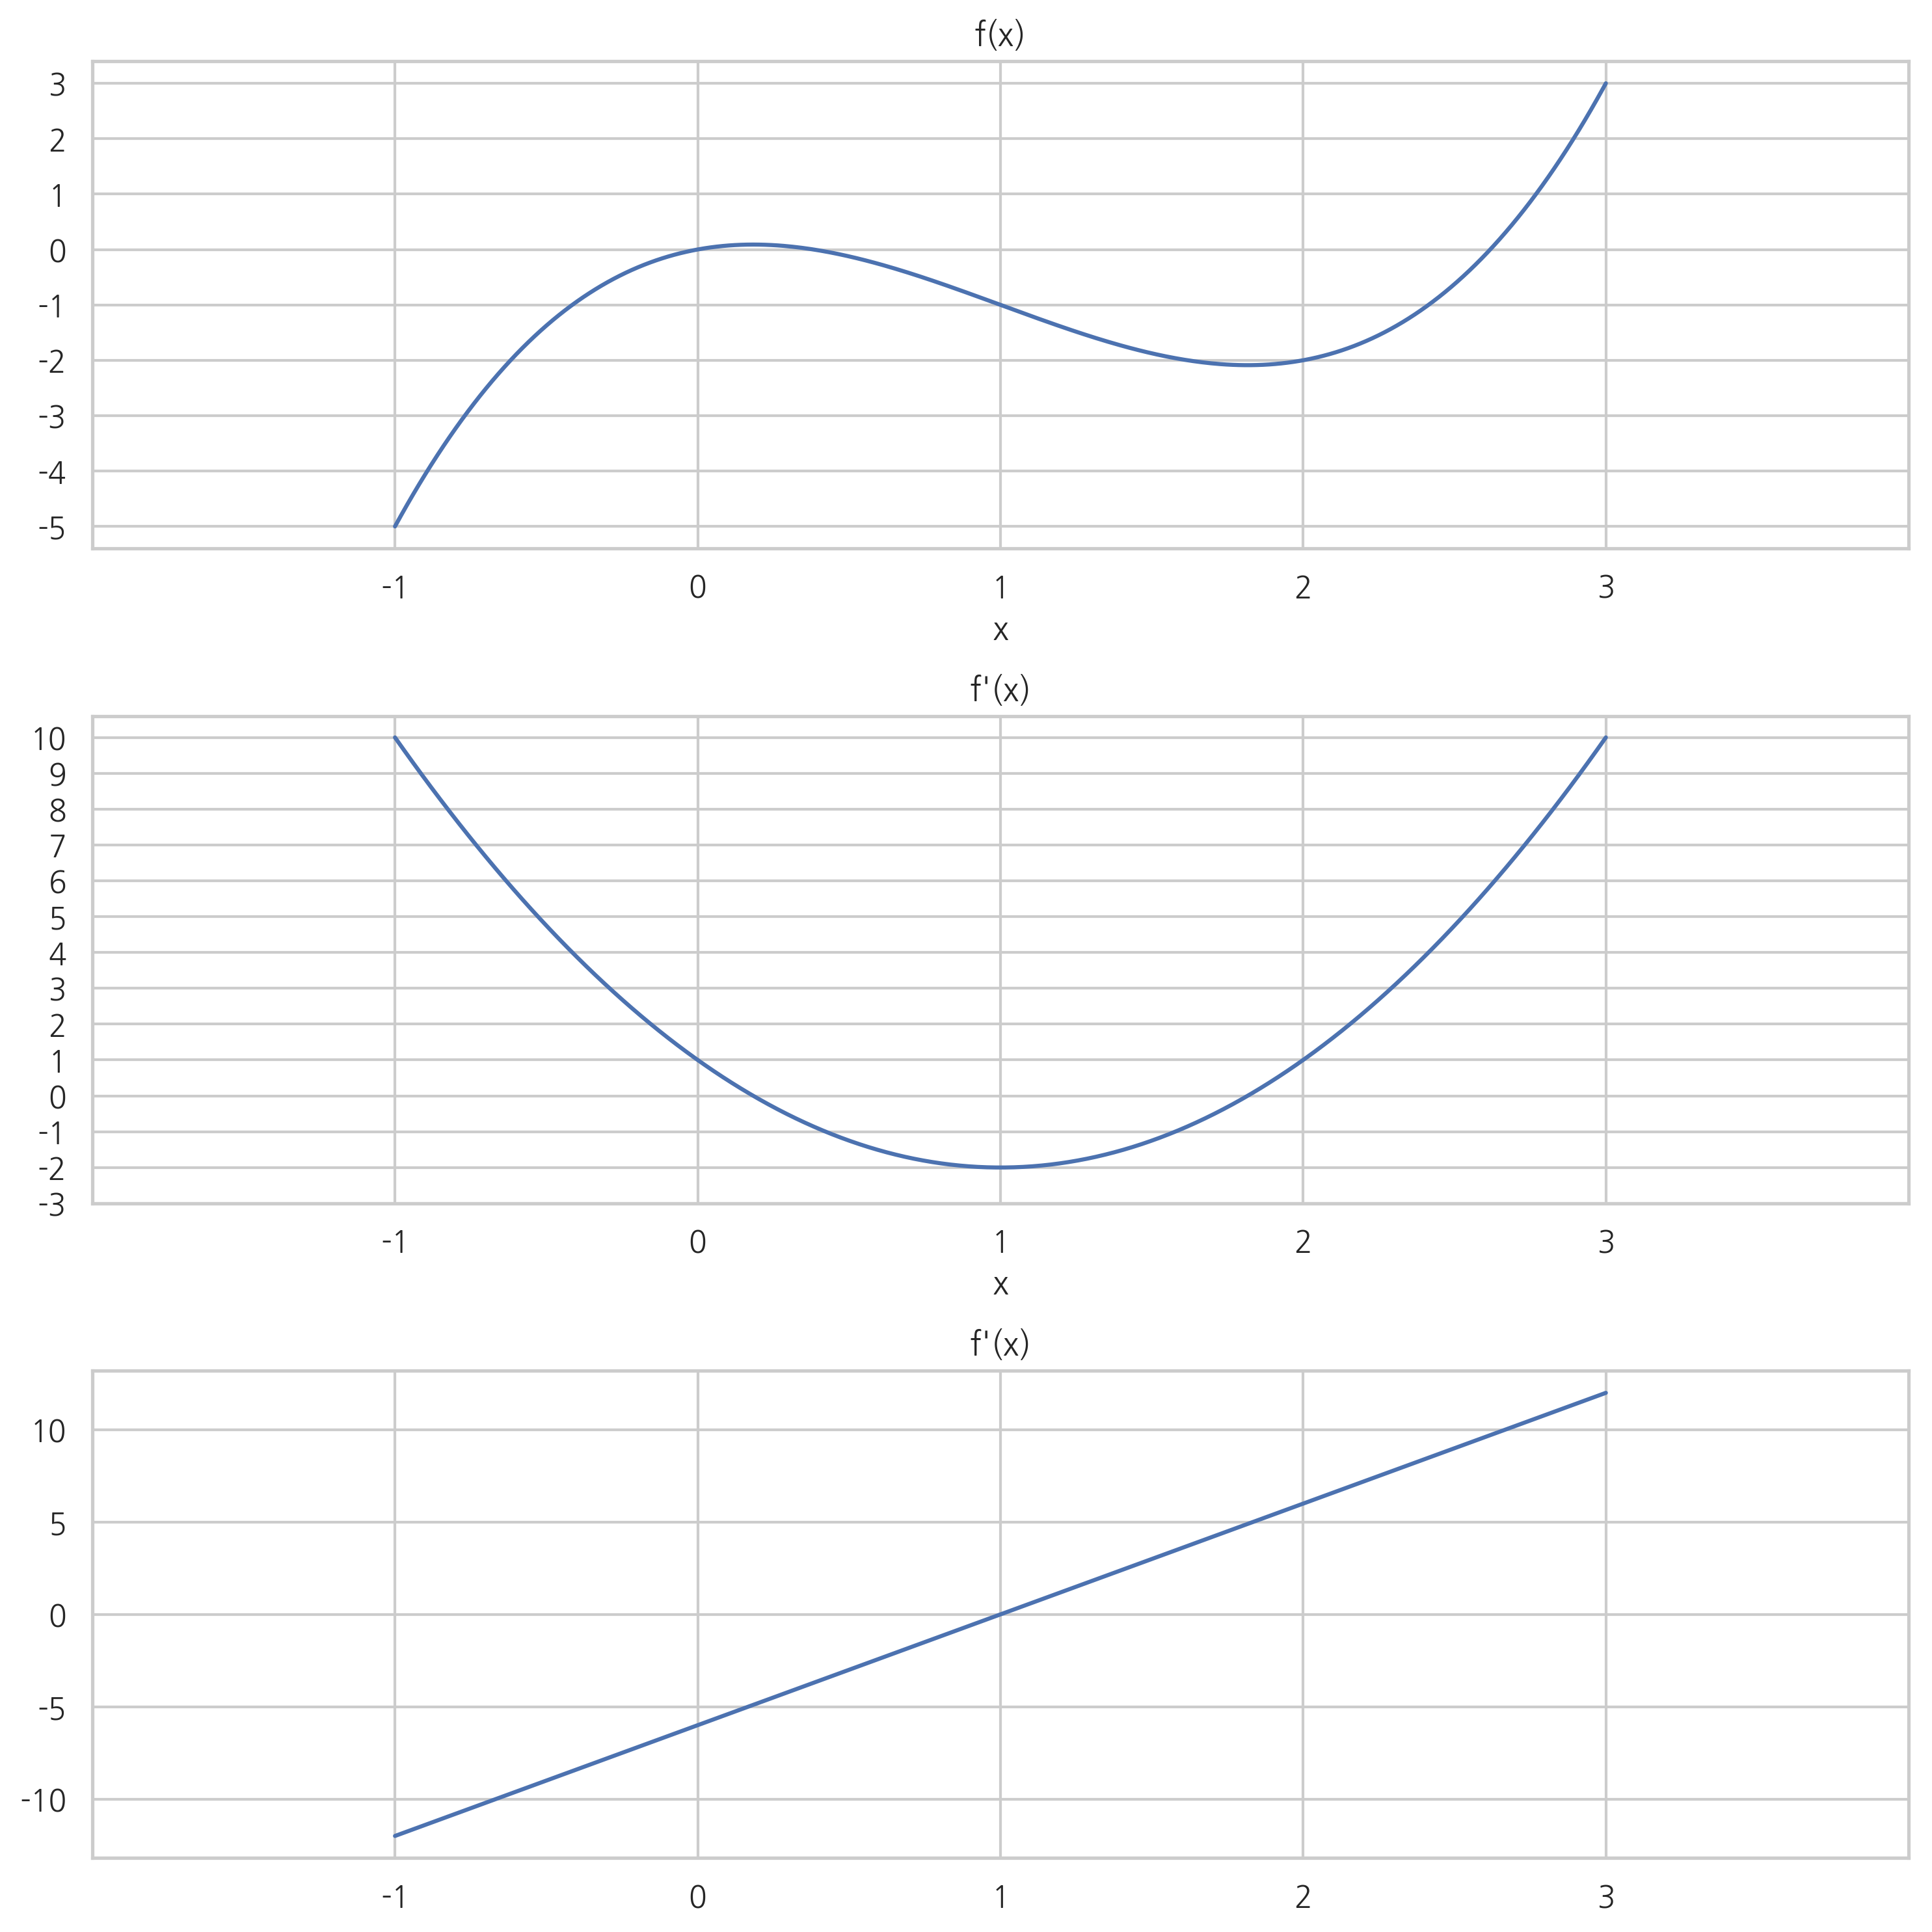

In [8]:
def fprime2(x):
    return 6*x - 6


x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.xlabel('x')
plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.xlabel('x')
plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f'(x)")
plt.tight_layout()
plt.show()

## 편미분

만약 함수가 두 개 이상의 독립변수를 가지는 다변수 함수인 경우에도 미분 즉, 기울기는 하나의 변수에 대해서만 구할 수 있다. 이를 **편미분(partial differentiation)**이라고 한다. 따라서 편미분의 결과로 하나의 함수에 대해 여러 개의 도함수가 나올 수 있다.

편미분의 결과 즉 도함수는 독립 변수를 함수의 아랫첨자로 써서 표기하거나 $\partial$(round) 기호를 사용하여 표기한다. $x, y$ 두 개의 독립 변수를 가지는 함수 $f(x,y)$의 편미분 도함수는 다음과 같이 표기한다.

$$ f_x(x,y) = \dfrac{\partial f}{\partial x}$$


$$ f_y(x,y) = \dfrac{\partial f}{\partial y} $$


편미분을 하는 방법은 변수가 하나인 함수의 미분과 같다. 다만 **어떤 하나의 독립 변수에 대해 미분할 때는 다른 독립 변수를 상수로 생각하면 된다**. 예를 들어 $x$, $y$ 라는 두 개의 독립 변수를 가지는 함수에서 $x$로 편미분을 할 때는 $y$는 독립 변수가 아닌 상수로 생각한다. 마찬가지로 $y$로 편미분을 할 때는 $x$는 독립 변수가 아닌 상수로 생각한다.

<img src="https://datascienceschool.net/upfiles/816e894c32d24a458872a18b92e384c4.png" style="width:100%;">

그림 6.1.3 : 편미분의 방법

다음은 편미분의 간단한 예이다.

$$ f(x,y) = x^2 + 4xy + 4y^2 $$

$$ f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y $$

$$ f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y $$


편미분에 대해서도 2차 도함수를 정의할 수 있다. 편미분의 2차 도함수를 구할 때는 각각의 미분에 쓰이는 독립 변수를 자유롭게 선택할 수 있다. 

첫번째 미분과 두번째 미분에서 모두 $x$에 대해 미분하면 다음과 같이 표기한다.

$$ f_{xx}(x,y) = \dfrac{\partial^2 f}{\partial x^2} = 2 $$

첫번째 미분과 두번째 미분에서 모두 $y$에 대해 미분하면 다음과 같이 표기한다.

$$ f_{yy}(x,y) = \dfrac{\partial^2 f}{\partial y^2} = 8 $$

첫번째 미분에서는 $x$에 대해 미분하고 두번째 미분에서는 $y$에 대해 미분하면 다음과 같이 표기한다.

$$ f_{xy}(x,y) = \dfrac{\partial^2 f}{\partial y \partial x} = 4 $$

첫번째 미분에서는 $y$에 대해 미분하고 두번째 미분에서는 $x$에 대해 미분하면 다음과 같이 표기한다.

$$ f_{yx}(x,y) = \dfrac{\partial^2 f}{\partial x \partial y} = 4 $$


위 결과에서 $x$로 먼저 미분하고 나중에 $y$로 미분한 2차 도함수 $f_{xy}$는  $y$로 먼저 미분하고 나중에 $x$로 미분한 2차 도함수 $f_{yx}$와 같다. 만약 함수가 연속이고 미분가능하면 미분의 순서는 상관없다. 이를 **슈와르츠 정리(Schwarz's theorem)**라고 한다.

#### 연습 문제 6.1.7

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 구하라.

$$ f(x, y) = \exp{(x^2 + 2y^2)} $$

## SymPy

SymPy는 **심볼릭 연산(symbolic operation)**을 지원하기 위한 파이썬 패키지이다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉, $x^2$의 미분 연산을 수행하면 그 결과가 $2x$란 형태로 출력된다. 딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 theano 패키지나 tensorflow 패키지도 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다. 

In [9]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

심볼릭 연산에서 사용하는 **심볼릭 변수(symbolic variable)**는 일반 프로그래밍에서 사용하는 변수와 다르다. 일반 프로그래밍에서 사용하는 변수는 이미 메모리에 씌여있는 어떤 숫자를 기호로 쓴 것에 지나지 않지만 심볼릭 변수는 아무런 숫자도 대입이 되어 있지 않다. 따라서 $x^2$의 미분 연산을 수행하기 위해서는 우선 SymPy의 `symbols` 명령을 사용하여 $x$라는 기호가 단순한 숫자나 벡터 변수가 아닌 심볼(symbol)임을 알려주어야 한다. 이렇게 정의된 심볼 변수는 `Symbol` 클래스 자료형이 된다.

In [10]:
x = sympy.symbols('x')
x

x

In [11]:
type(x)

sympy.core.symbol.Symbol

일단 심볼 변수를 정의하면 이를 사용하여 다음과 같이 함수를 정의한다. 이 때 수학 함수는 SymPy 전용 함수를 사용해야 한다.

In [12]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

함수가 정의되면 `diff` 함수로 미분을 할 수 있다. 또한 `simplify` 함수를 써서 소인수분해 등을 통한 수식 정리가 가능하다.

In [13]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [14]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

편미분을 하는 경우에는 어떤 변수로 미분하는지를 `diff` 함수에 명시해야 한다. `symbols` 명령을 사용할 때는 인수로 주는 문자열에 여러개의 심볼 변수를 동시에 넣을 수도 있다.

In [15]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [16]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [17]:
sympy.diff(f, y)

4⋅x + 8⋅y

상수 심볼을 포함하는 함수를 미분하는 경우, SymPy는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기 때문에 편미분인 것처럼 입력 변수를 지정해야 한다.

In [18]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [19]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [20]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

이차 도함수는 다음처럼 구한다.

In [21]:
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

#### 연습 문제 6.1.8

다음 함수를 미분한 도함수를 SymPy를 사용하여 구하라. 여기에서 $k$, $a$, $b$는 변수가 아니라 상수이다.

1. $ f(x) = x^3 - 1 $
2. $ f(x) = \log (x^{2}-3k) $
3. $ f(x) =\exp({ax^b}) $


#### 연습 문제 6.1.9

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 SymPy로 구하라.

$$ f(x, y) = \exp{(x^2 + 2y^2)} $$

## 테일러 전개

함수의 기울기(1차 미분값)를 알고 있다면 함수의 모양을 다음처럼 근사화할 수 있다. $x_0$는 함수값과 기울기를 구하는 $x$ 위치이며 사용자가 마음대로 설정할 수 있다.

$$ 
f(x) \approx f(x_0) + \dfrac{df(x_0)}{dx}(x - x_0)
$$

이를 **테일러전개(Talor expansion)**라고 한다. 다변수 함수의 경우에는 다음처럼 테일러전개를 한다.

$$ 
f(x, y) \approx f(x_0, y_0) 
+ \dfrac{\partial f(x_0, y_0)}{\partial x}(x - x_0)
+ \dfrac{\partial f(x_0, y_0)}{\partial y}(y - y_0)
$$
